# Follower and Following analyze

We would like to calculte for each user the monition. That Formula came from the Twi-Bot20 article.

According to this formula whoever is closer to zero is probably a bot.

In [1]:
import pandas as pd
import numpy as np
#calcultaion monitin for users to find bot based on the Twi-bot20 research
# reputation(u) = follower(u) / (following(u)+follower(u))

USERS_DATASET_PATH = 'twitter_human_bots_dataset/users_dataset.csv'
users_df = pd.read_csv(USERS_DATASET_PATH, index_col=0)
reputation_set = users_df.get(['id', 'followers_count', 'friends_count'])
reputation_set = reputation_set.rename(columns={"friends_count": "following_count"})

In [2]:
# calcultaion monitin
reputation_value = reputation_set.T.loc['followers_count'] / (reputation_set.T.loc['following_count']+reputation_set.T.loc['followers_count'])
reputation_set.insert(3, "reputation", reputation_value, True)
reputation_set

,id,followers_count,following_count,reputation
0,53779179,102,168,0.377778
1,105916557,60,128,0.319149
2,509788597,599,449,0.571565
3,70601327,116,334,0.257778
4,108999927,74448,18,0.999758
...,...,...,...,...
37433,223764929,257294,196,0.999239
37434,222789645,74666,95,0.998729
37435,80438218,255941,236,0.999079
37436,1296642259,2678042,51,0.999981


In [3]:
sorted_reputation_set = reputation_set.sort_values(by=['reputation']) # sort reputation
sorted_reputation_set.dropna(subset = ["reputation"], inplace=True) # drop NaN
sorted_reputation_set

,id,followers_count,following_count,reputation
29716,365476963,0,8,0.0
33660,832724063445405696,0,2,0.0
16430,784318418862284800,0,21,0.0
13798,849647465989058564,0,23,0.0
14617,862629757,0,47,0.0
...,...,...,...,...
4199,832027121430183936,23,0,1.0
31895,2944686696,6,0,1.0
11076,764449095213780992,27,0,1.0
23004,364005350,7,0,1.0


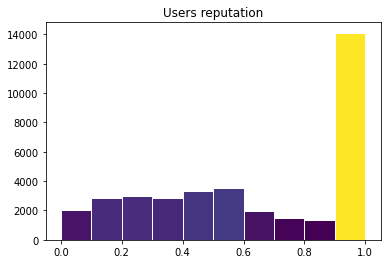

length of each partition  [ 2018.  2857.  2986.  2831.  3308.  3496.  1983.  1467.  1346. 14112.]


In [4]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

n_bins = 10
reputation_valus = list(sorted_reputation_set.get('reputation'))
plt.title('Users reputation')
N, bins, patches = plt.hist(reputation_valus, n_bins, edgecolor='white')
fracs = N / N.max()
# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())
# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
# We can also normalize our inputs by the total number of counts
plt.hist(reputation_valus, bins=n_bins, density=True)
plt.show()
print("length of each partition ", N)

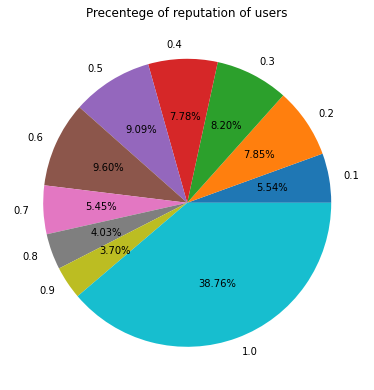

In [5]:
percent = [i/sum(N)*100 for i in N]
mylabels = ["0.1", "0.2", "0.3", "0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]
fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
y = np.array(percent)
ax.pie(y, labels = mylabels,autopct='%1.2f%%')
ax.set_title("Precentege of reputation of users")
plt.show()

We can asume that who is 0-0.1 is defently bot, we can compare it between the original DB from kaggle to be sure.

compare size of dataframes:  74876 74876
      account_type                  id  reputation
29716          bot           365476963         0.0
33660          bot  832724063445405696         0.0
16430          bot  784318418862284800         0.0
13798          bot  849647465989058564         0.0
14617          bot           862629757         0.0
...            ...                 ...         ...
37110          bot  877491177876054017         NaN
37116          bot  877405056966037504         NaN
37129          bot  877398270519070720         NaN
37177          bot  877405472747401217         NaN
37349          bot  878072807107600384         NaN

[12425 rows x 3 columns]
bot number:  37275
precentege of bot by reputation: [11.527208894090112, 10.540834238903285, 9.186658864833236, 7.247345983448968, 7.121959374738777, 6.5368218674245595, 3.067792359775976, 2.273677171278108, 1.9727493103736522, 40.52495193513333]
length of each partition  [1379. 1261. 1099.  867.  852.  782.  367.  272.

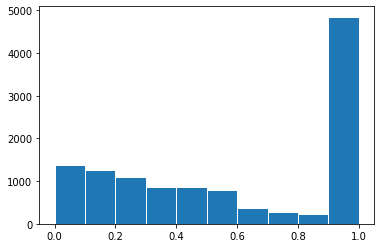

In [6]:
account_type = users_df.get(['account_type', 'id'])
id_reputation_value = reputation_set.get(['reputation', 'id'])
print("compare size of dataframes: ", account_type.size, id_reputation_value.size)
df_all_rows = pd.merge(account_type, id_reputation_value, how='inner', on = 'id')
sorted_df_all_rows = df_all_rows.sort_values(by=['reputation'])
bot_vs_reputation = sorted_df_all_rows.loc[sorted_df_all_rows['account_type']=='bot']
print(bot_vs_reputation)
print("bot number: ", bot_vs_reputation.size)
n_bins = 10
bot_reputation_values = list(bot_vs_reputation.get('reputation'))
N1, bins1, patches1 = plt.hist(bot_reputation_values, n_bins, edgecolor='white')
percenteg1 = [i/sum(N1)*100 for i in N1]
print("precentege of bot by reputation:", percenteg1)
print("length of each partition ", N1)

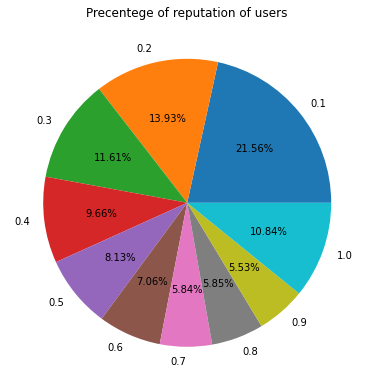

In [7]:
bot_prec_from_each_partition = []
for n1, n2 in zip(N1, N): # 
    bot_prec_from_each_partition.append(n1/n2)
mylabels1 = ["0.1", "0.2", "0.3", "0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]

fig1 = plt.figure(figsize=(5,5))
ax1 = fig1.add_axes([0,0,1,1])
ax1.axis('equal')
y1 = np.array(bot_prec_from_each_partition)
ax1.pie(y1, labels = mylabels1,autopct='%1.2f%%')
ax1.set_title("Precentege of reputation of users")
plt.show()

Now we are can be pretty sure that we found bots, and the formula is a good criteria at 0-0.1.

## users id network by followers and following

ניקח את הטבלה של הנעקבים ונבנה ממנה גרפים שנבין מה קורה לנו ברשת

קודם ננתח מעט את הדאטא וננקה אותו ע"מ להציג אותו כהלכה בגרף

In [55]:
import re
follower_csv_file = r"twitter_human_bots_dataset/followers040522.csv"
follower_data = pd.read_csv(follower_csv_file, encoding='latin-1')

# data overviwe
print(f"Rows Count: {follower_data.shape[0]}")
print(f"Features Count: {follower_data.shape[1]}")

#crate edges list from users following list
users_following_data = follower_data.get(['followed_id','follower_id'])
users_following_data_withoutnone = users_following_data[users_following_data.followed_id != " "].dropna()
users_following_data_withoutnone = users_following_data_withoutnone[users_following_data_withoutnone.follower_id != " "].dropna()
users_following_data_withoutnone.to_csv(r'twitter_human_bots_dataset/edge_list.txt', header=None, index=None, sep=' ', mode='a')
users_following_data_withoutnone # the first data from the Twitter API

Rows Count: 44558
Features Count: 12


,followed_id,follower_id
0,53779179.0,7.820000e+17
1,53779179.0,1.390000e+18
2,53779179.0,1.470000e+18
3,53779179.0,1.480000e+18
4,53779179.0,1.032883e+08
...,...,...
44553,62204119.0,2.123391e+08
44554,62204119.0,1.851208e+08
44555,62204119.0,9.322179e+07
44556,62204119.0,1.541112e+07


יצירת דאטא שבו רשום לכל יוזר אחרי כמה הוא עוקב אחריהם

In [56]:
from collections import defaultdict

users_dic = {}
counter_none = 0
for index, row in users_following_data_withoutnone.iterrows():
    try:
        if isinstance(row['followed_id'], float) and isinstance(row['follower_id'], float):
            user_id = int(float(row['followed_id']))
            following_id = int(float(row['follower_id']))
            if users_dic.get(user_id) is None: # if the key is new in dic
                users_dic[user_id] = []
                users_dic[user_id].append(following_id) # create key by user id and add following user id            
            else:
                if not following_id in users_dic[user_id]: # if the following user is new
                    users_dic[user_id].append(following_id)
        else:
            counter_none+=1 # problem with data
    except Exception as e:
        print(index, e)
            
print("number of users with data form Twitter API: ", len(users_dic))
print("number of missing data: ", counter_none)

number of users with data form Twitter API:  84
number of missing data:  0


In [57]:
dic_followers_len = {}
for key, values in users_dic.items():
    dic_followers_len[key]= len(values)
print("dic_followers_len: ",len(dic_followers_len))
sorted_dict = {}
sorted_keys = sorted(dic_followers_len, key=dic_followers_len.get,  reverse=True)
for w in sorted_keys:
    sorted_dict[w] = dic_followers_len[w]

print("The user sorted by the folloeing number: ", sorted_dict)

dic_followers_len:  84
The user sorted by the folloeing number:  {2227979517: 998, 120538744: 998, 410303609: 998, 292920781: 990, 206795782: 947, 121389491: 920, 194490327: 918, 172028587: 888, 16378198: 879, 281473975: 807, 2444454050: 792, 319916258: 786, 28471026: 785, 16967612: 749, 242916135: 622, 62204119: 594, 17685964: 566, 27055023: 565, 509788597: 561, 31139434: 550, 44051445: 542, 155568211: 539, 284265377: 503, 262355899: 499, 1449155815: 493, 2806413827: 484, 99847971: 476, 108999927: 442, 3930997512: 422, 15998107: 411, 488512845: 389, 49031917: 384, 169421357: 374, 2557037323: 363, 138600717: 355, 3237927257: 345, 997629601: 340, 49717874: 311, 66209470: 288, 569581750: 285, 1210485564: 223, 105874636: 200, 1063034450: 190, 2952010610: 190, 8161232: 185, 709541000000000000: 178, 496493810: 172, 36149861: 130, 70601327: 115, 50885229: 114, 955613694: 110, 237947008: 104, 892830000000000000: 102, 1353020900: 100, 53779179: 98, 3262306109: 92, 54135314: 84, 178218286: 81, 

In [58]:
# merge the users_following_data_withoutnone to graph with labels
users_id_following_data = users_following_data_withoutnone.rename(columns={"followed_id": "id"})
users_id_following_data['id'] = users_id_following_data['id'].astype(np.int64)
users_id_following_data['follower_id'] = users_id_following_data['follower_id'].astype(np.int64)
df_all_rows = pd.merge(users_id_following_data, sorted_df_all_rows, on = "id" )
drop_id = df_all_rows.drop_duplicates(subset=['id'])
drop_id = drop_id.drop(columns="follower_id")
drop_id

,id,account_type,reputation
0,53779179,bot,0.377778
120,105916557,human,0.319149
177,509788597,human,0.571565
744,70601327,human,0.257778
859,108999927,human,0.999758
...,...,...,...
42187,313116175,bot,1.000000
42191,3237927257,bot,0.788235
42586,50885229,human,0.663043
42715,3327665070,human,0.080092


יצירת 2 רשימות לפי מספר יוזר בשביל סיווג בצבעים בגרף

In [59]:
bot_node_only_list = list(drop_id.loc[drop_id['account_type']=='bot'].get('id'))
print(bot_node_only_list)
human_node_only_list = list(drop_id.loc[drop_id['account_type']=='human'].get('id'))
print(human_node_only_list)

[53779179, 99847971, 963263894, 15380583, 194490327, 266567089, 524229856, 2753102609, 2493362950, 955613694, 3262306109, 507975093, 2765054066, 2370489267, 2157748434, 250983398, 537500546, 1449155815, 44051445, 26152058, 3346363073, 313116175, 3237927257]
[105916557, 509788597, 70601327, 108999927, 155100760, 178218286, 1063034450, 17685964, 49031917, 206795782, 2806413827, 54135314, 262355899, 66209470, 237947008, 105874636, 496493810, 8161232, 284265377, 172028587, 2444454050, 1353020900, 997629601, 36149861, 242916135, 865213866, 49717874, 319916258, 33416325, 27055023, 2557037323, 3930997512, 2227979517, 292920781, 28471026, 31139434, 121389491, 120538744, 410303609, 1210485564, 16967612, 281473975, 488512845, 2952010610, 169421357, 33289393, 15998107, 138600717, 16378198, 3245648312, 392228721, 569581750, 155568211, 50885229, 3327665070, 62204119]


## using networkX

In [66]:
import networkx as nx

G = nx.from_pandas_edgelist(df_all_rows, source='id', target='follower_id')
print("Number of nodes: ", nx.number_of_nodes(G)) # size of nodes in graph
print("number_connected_component: ", nx.number_connected_components(G))

Number of nodes:  21984
number_connected_component:  8


נרדד את הגרף מעט, כיוון שלצייר גרף בסדר גודל כזה גם לוקח זמן וגם קשה לסדר אותו בצורה נורמלית להבנה
לכן הורדתי את הדרגות צומת שהם פחות מ2 (ויש לא מעט כאלה, ארחיב בניתוח גרף הבא)
לאחר מכן ביצעתי צמצום של הצמתים רנדומלית, כלומר כל הצגה של הגרף נקבל משהו אחר
לאחר מכן לקחתי את רכיב הקשירות הכי גדול בגרף
והבלטתי את הצמתים לפי
centrality
בעצם כמה הם מרכזיים בגרף ולמצוא את הנתיבים הקצרים דרכם בגרף

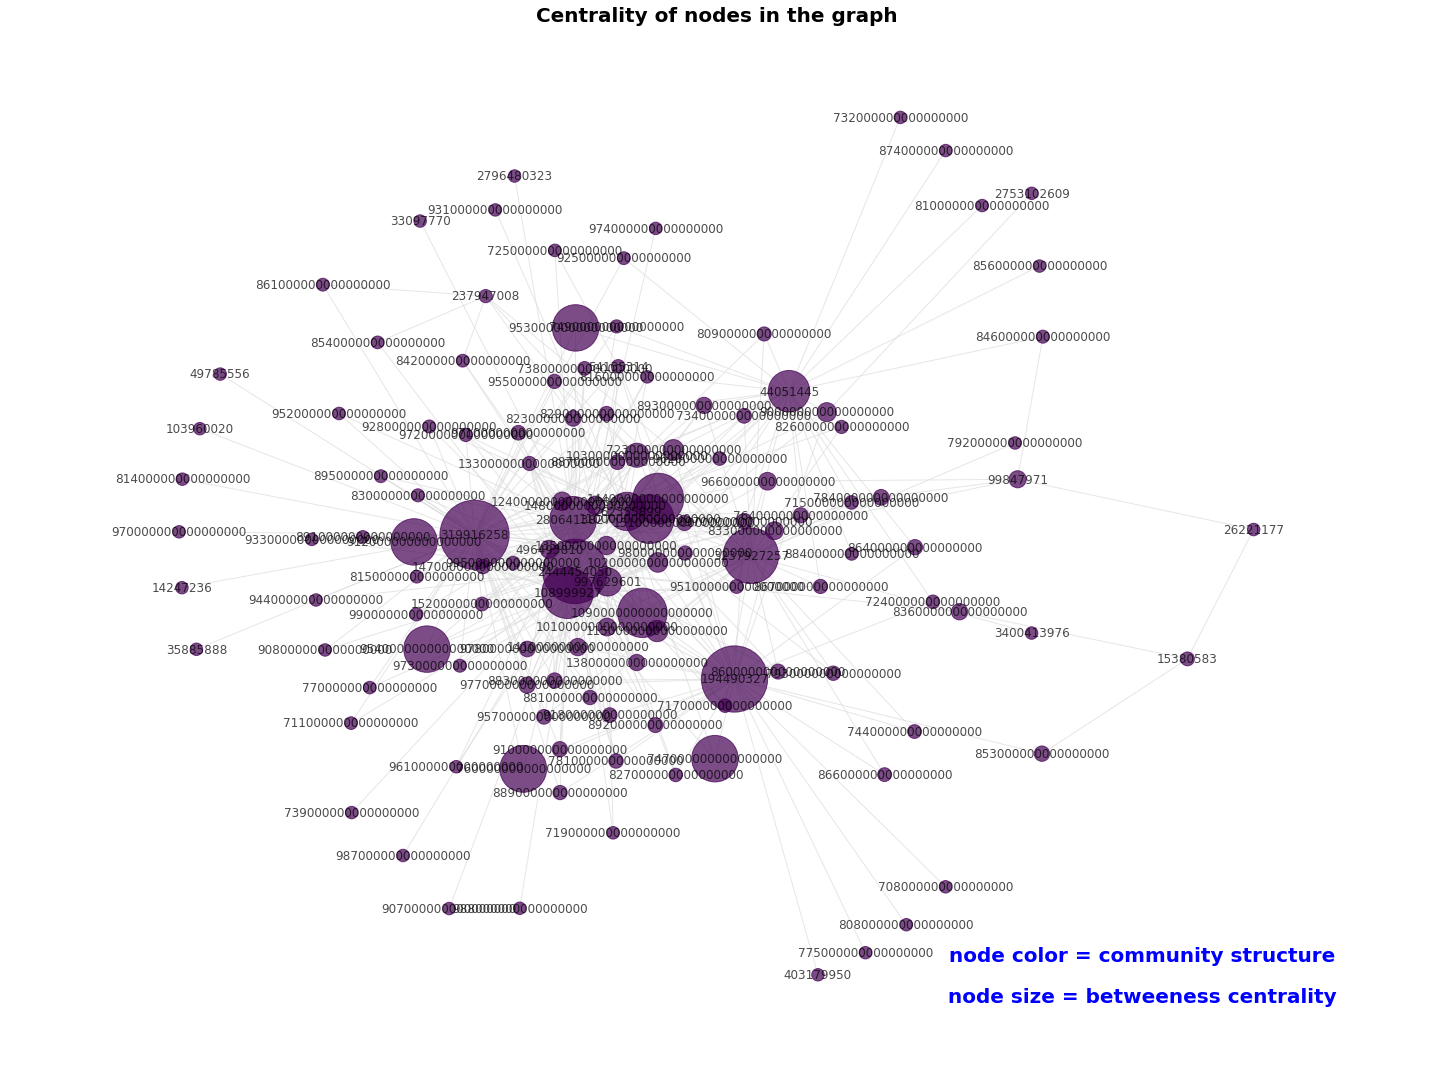

In [14]:
from random import sample

G1 = G
# remove low-degree nodes
low_degree = [n for n, d in G.degree() if d < 2]
G1.remove_nodes_from(low_degree)

# remove randomly selected nodes (to make example fast)
num_to_remove = int(len(G1) / 1.5)
nodes = sample(list(G1.nodes), num_to_remove)
G1.remove_nodes_from(nodes)

# largest connected component
components = nx.connected_components(G1)
largest_component = max(components, key=len)
H = G1.subgraph(largest_component)

# Compute the shortest-path betweenness centrality for nodes
centrality = nx.betweenness_centrality(H, k=10, endpoints=True) 
# compute community structure
lpc = nx.community.label_propagation_communities(H)
community_index = {n: i for i, com in enumerate(lpc) for n in com}

#### draw graph ####
fig, ax = plt.subplots(figsize=(20, 15))
pos = nx.spring_layout(H, k=0.15, seed=4572321)
node_color = [community_index[n] for n in H]
node_size = [v * 20000 for v in centrality.values()]
nx.draw_networkx(
    H,
    pos=pos,
    with_labels=True,
    node_color=node_color,
    node_size=node_size,
    edge_color="gainsboro",
    alpha=0.7,
)
# Title/legend
font = {"color": "k", "fontweight": "bold", "fontsize": 20}
ax.set_title("Centrality of nodes in the graph", font)
# Change font color for legend
font["color"] = "b"

ax.text(
    0.80,
    0.10,
    "node color = community structure",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)
ax.text(
    0.80,
    0.06,
    "node size = betweeness centrality",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)

# Resize figure for label readibility
ax.margins(0.1, 0.05)
fig.tight_layout()
plt.axis("off")
plt.show()

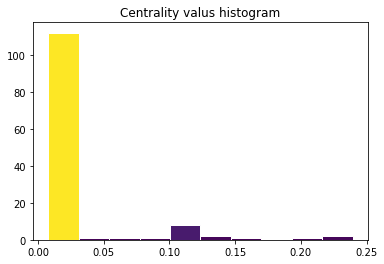

length of each partition  [112.   1.   1.   1.   8.   2.   1.   0.   1.   2.]


In [51]:
#histofram of the centrality in the graph
n_bins = 10
centrality_valus = centrality.values()
plt.title('Centrality valus histogram')
N, bins, patches = plt.hist(centrality_valus, n_bins, edgecolor='white')
fracs = N / N.max()
# we need to normalize the data for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())
# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
plt.show()
print("length of each partition ", N)

כלומר יש מעט צמתים שיוצרים את המרכזיות בגרף ולכן ניתן בעיקר לעבוד איתם במקרים מסויימים ע"מ לחפש בגרף התאמות

## חלוקת הגרף שקיבלנו לצמתים לפי סיווג

In [31]:
# prepare data for networkX
bot_node_size = []
bot_node_only_list = [b_no for b_no in bot_node_only_list if b_no in H.nodes]
if len(bot_node_only_list)> 0:
    centrality_bots_valus = [centrality[bot] for bot in bot_node_only_list]
    bot_node_size = [v * 20000 for v in centrality_bots_valus]

human_node_size =[]
human_node_only_list = [b_no for b_no in human_node_only_list if b_no in H.nodes]
if len(human_node_only_list) > 0:
    centrality_human_valus = [centrality[human] for human in human_node_only_list]
    human_node_size = [v * 20000 for v in centrality_human_valus]

other_node_size = []
nodes_to_out = human_node_only_list + bot_node_only_list
other_nodes = [no for no in H.nodes if not no in nodes_to_out]
if len(other_nodes) > 0:
    centrality_other_valus = [centrality[other] for other in other_nodes]
    other_node_size = [v * 20000 for v in centrality_other_valus]

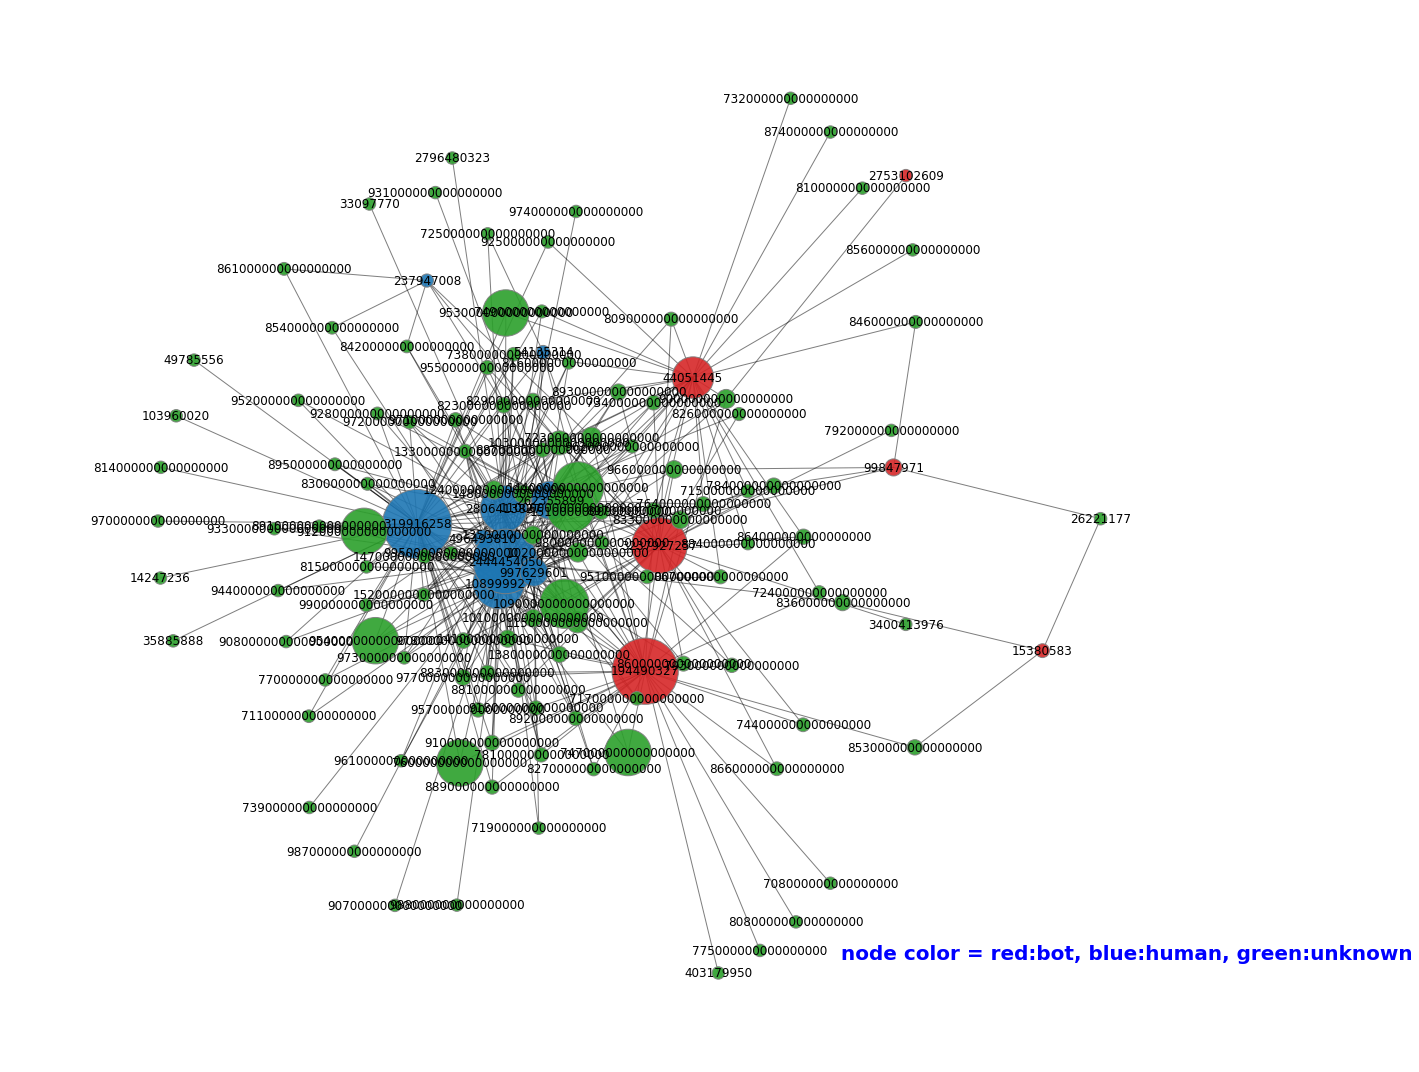

In [32]:
#start plot
fig, ax = plt.subplots(figsize=(20, 15))

nx.draw_networkx_labels(H, pos, font_size=12, font_family="sans-serif") # draw labels

#draw all nodes
options = {"edgecolors": "tab:gray", "alpha": 0.9}
nx.draw_networkx_nodes(H, pos=pos, nodelist=bot_node_only_list, node_color="tab:red",node_size=bot_node_size, **options)
nx.draw_networkx_nodes(H, pos=pos, nodelist=human_node_only_list, node_color="tab:blue",node_size=human_node_size, **options)
nx.draw_networkx_nodes(H, pos=pos, nodelist=other_nodes, node_color="tab:green",node_size=other_node_size, **options)

nx.draw_networkx_edges(H, pos, width=1.0, alpha=0.5)

ax.text(
    0.90,
    0.10,
    "node color = red:bot, blue:human, green:unknown",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)
# Resize figure for label readibility
ax.margins(0.1, 0.05)
fig.tight_layout()
plt.axis("off")
plt.show()

לעיתים נקבל גרפים שונים אז נשים פה דוגמא שבה ניתן למצוא לפחות בוט אחד בגרף

![Bot plot](img/bot_graph.jpeg)

In [33]:
centrality_bots_valus

[0.01462474388740384,
 0.00962733328093732,
 0.2196325727299247,
 0.0078125,
 0.0861183180244976,
 0.15434825159768628]

מסקנות:

בוטים לא בהכרח יהיו מרכזיים בגרפים שלנו לכן זה לא פרמטר איכותי מספיק להספיק ממנו מסקנה

עם זאת קיבלנו הבחנה יפה לאיך נראה הגרף שלנו ואפשר להמשיך לנתח לפי פרמטרים אחרים

### Degree Analysis

הגרף הזה בעיקר משמש אותנו להבין מה קורה ברשת, איך היא בנויה, מי הצמתים המרכזיים, ומי המקשרים שלנו בגרף.

In [61]:
G.degree() # we will notice we have a lot of 1 degree

DegreeView({53779179: 98, 782000000000000000: 11, 1390000000000000000: 32, 1470000000000000000: 29, 1480000000000000000: 33, 103288329: 1, 1440000000000000000: 35, 3402076510: 1, 1080000000000000000: 33, 1310000000000000000: 32, 1380000000000000000: 31, 746000000000000000: 12, 1350000000000000000: 34, 992000000000000000: 6, 1250000000000000000: 37, 1230000000000000000: 29, 532688190: 1, 1130000000000000000: 34, 1220000000000000000: 32, 820000000000000000: 13, 1290000000000000000: 32, 1320000000000000000: 31, 1270000000000000000: 33, 838000000000000000: 17, 2769997956: 1, 1140000000000000000: 32, 1260000000000000000: 31, 974000000000000000: 6, 737000000000000000: 10, 1160000000000000000: 30, 1210000000000000000: 30, 951000000000000000: 10, 1300000000000000000: 33, 1030000000000000000: 32, 842000000000000000: 8, 1110000000000000000: 35, 3304258775: 1, 994000000000000000: 8, 220717217: 1, 4035230745: 1, 870000000000000000: 11, 3331954403: 1, 64425077: 1, 46815315: 1, 1280000000000000000: 

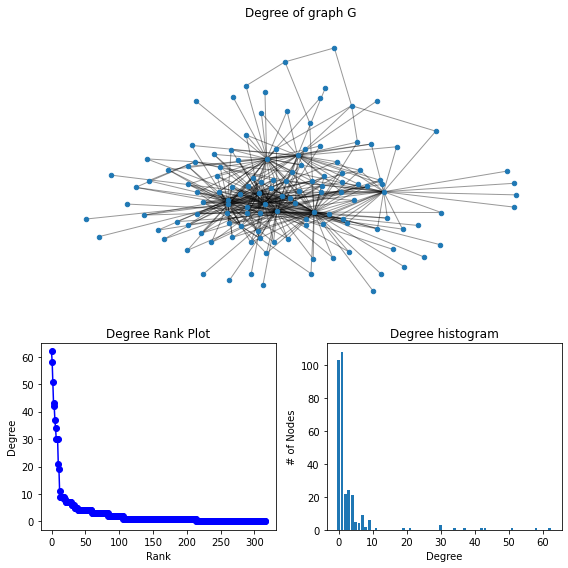

In [38]:
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure(figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Degree of graph G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

better look at the graph is by this plot, a lot degree of one ![Degree Plot](img/connected_components_ofG_by_degre.jpg)

In [67]:
from collections import Counter

print("has_bridges: ", nx.has_bridges(G))
bridges = list(nx.bridges(G))
bridges_keys = [k for k, v in bridges]
# find common bridges in set
c = Counter(bridges_keys)
print(c.most_common(5))

has_bridges:  True
[(410303609, 994), (120538744, 981), (2227979517, 966), (292920781, 936), (206795782, 827)]


if we remove its bridges we create more components. for ex:

In [68]:
print(nx.number_connected_components(G))
G2=G
G2.remove_nodes_from(list(c)[:5])
print(nx.number_connected_components(G2))

8
724


## Community Detection for bot

we will try to understand if the bots are connected to each other

In [72]:
!pip install python-louvain

You should consider upgrading via the 'C:\Dev_projects\TwitterBotsProject\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [103]:
only_bots = df_all_rows.loc[df_all_rows['account_type']=='bot']
labels = list(only_bots[''])
G_only_bots = nx.from_pandas_edgelist(only_bots, source='id', target='follower_id')
print("Number of nodes: ", nx.number_of_nodes(G_only_bots)) # size of nodes in graph
print("number_connected_component: ", nx.number_connected_components(G_only_bots))
G2 = G_only_bots
low_degree_bots_only = [n for n, d in G_only_bots.degree() if d < 5]
G2.remove_nodes_from(low_degree_bots_only)

Number of nodes:  2933
number_connected_component:  6


# מציאות קליקות

max clique number:  2


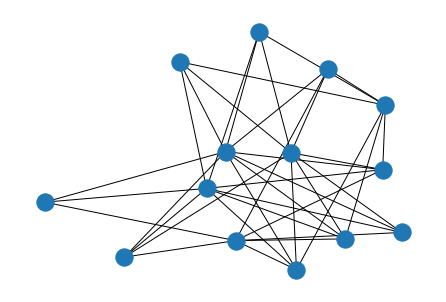

In [194]:
print("max clique number: ",nx.graph_clique_number(G2))
cliques = nx.find_cliques(G2)
cliques4 = [clq for clq in cliques if len(clq) >= 2]
nodes = set(n for clq in cliques4 for n in clq)
h = G2.subgraph(nodes)
deg = nx.degree(h)
nodes = [n for n in nodes if deg[n] >= 4]
k = h.subgraph(nodes)
nx.draw(k)

כלומר יש לנו בגרף חיבורים של 2 בלבד ברשת הזו - ננסה למצוא את החיבורים הנ"ל

### best_partition By Louvain Community Detection Algorithm

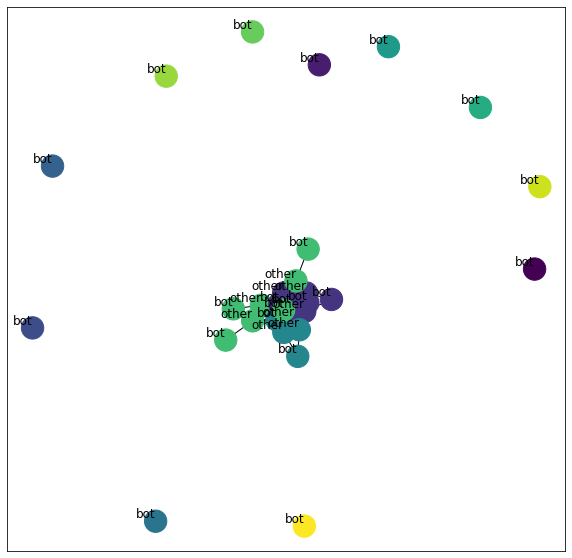

The modularity based on networkx is 0.16895085066162574


In [170]:
# https://towardsdatascience.com/louvains-algorithm-for-community-detection-in-python-95ff7f675306
# Find the best partition of a graph using the Louvain Community Detection Algorithm
# Louvain Community Detection Algorithm is a simple method to extract the community structure of a network.
# This is a heuristic method based on modularity optimization
from community import community_louvain
import matplotlib.cm as cm

plt.figure(figsize=(10, 10))
#first compute the best partition
partition = community_louvain.best_partition(G2)
bots_partition_nodes = {x:('bot' if x in bot_node_only_list else 'other') for (x, v) in partition.items()}

# draw the graph
pos = nx.spring_layout(G2)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_labels(G2, pos, labels=bots_partition_nodes, horizontalalignment='right',verticalalignment='bottom')
nx.draw_networkx_nodes(G2, pos, partition.keys(), node_size=500,
                       cmap=cmap, node_color=list(partition.values()))

nx.draw_networkx_edges(G2, pos)
plt.show()

modularity2 = community_louvain.modularity(partition, G2)
print("The modularity based on networkx is {}".format(modularity2))

אנחנו רואים כי המדד מודולריות הוא לא גבוה כלומר לא בהכרח ניתן לחלק את קבוצת הבוטים לקבוצות ולהפרדה כי הם מתערבבים בתוך הרשת.

עם זאת אנחנו כן רואים כי ישנם קשרים בין הבוטים ברשת וניתן למצוא אותם ע"י חיפוש בין היוזרים השונים
אבל ע"י פרמטרים אחרים.